In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

Load the dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the input data

In [4]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0


# One-hot encode the labels

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the CNN model

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model

In [8]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
model.save('mnist.h5')

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.8325 - loss: 0.5409 - val_accuracy: 0.9850 - val_loss: 0.0567
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9713 - loss: 0.0989 - val_accuracy: 0.9880 - val_loss: 0.0453
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.9804 - loss: 0.0707 - val_accuracy: 0.9903 - val_loss: 0.0367
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9833 - loss: 0.0554 - val_accuracy: 0.9898 - val_loss: 0.0383
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9875 - loss: 0.0432 - val_accuracy: 0.9905 - val_loss: 0.0378


# Evaluate the model

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9872 - loss: 0.0364
Test accuracy: 99.02%


# Predict and visualize results

In [10]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


# Visualize a few predictions

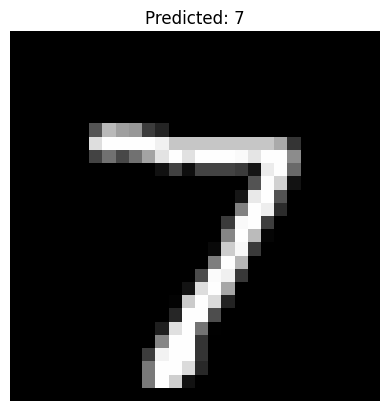

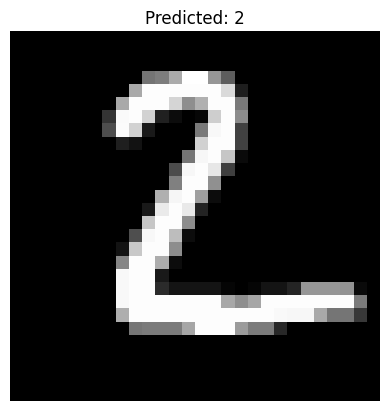

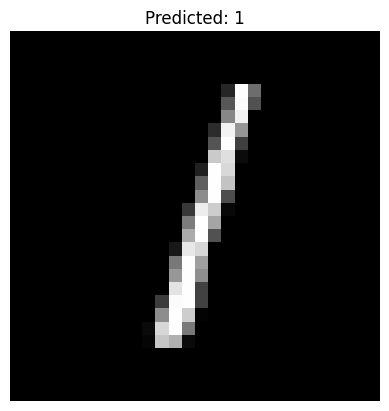

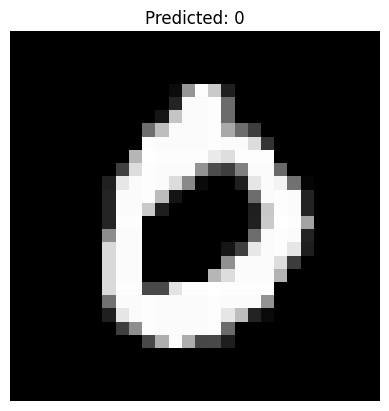

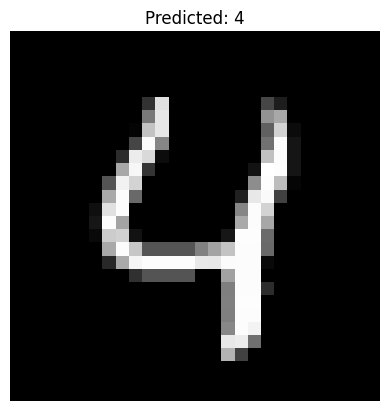

In [11]:
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()